# Model import using the Petab format

In this notebook, we illustrate using pyPESTO together with PEtab and AMICI. We employ models from the benchmark collection, which we first download:

In [2]:
import pypesto
import amici
import petab

import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Download benchmark models - Note: 200MB :(
!git clone --depth 1 https://github.com/LeonardSchmiester/Benchmark-Models.git tmp/benchmark-models || (cd tmp/benchmark-models && git pull)

fatal: destination path 'tmp/benchmark-models' already exists and is not an empty directory.
Already up to date.


## Manage PEtab model

A PEtab problem comprises all the information on the model, the data and the parameters to perform parameter estimation:

In [97]:
folder_base = "tmp/benchmark-models/hackathon_contributions_new_data_format/"
model_name = "Zheng_PNAS2012"
model_name = "Boehm_JProteomeRes2014"
model_name = "Fujita_SciSignal2010"
model_name = "Sneyd_PNAS2002"
model_name = "Borghans_BiophysChem1997"
model_name = "Elowitz_Nature2000"
model_name = "Crauste_CellSystems2017"
#model_name = "Lucarelli_CellSystems2018"
#model_name = "Schwen_PONE2014"
model_name = "Blasi_CellSystems2016"
yaml_config = os.path.join(folder_base, model_name, model_name + '.yaml')

petab_problem = petab.Problem.from_yaml(yaml_config)

# e.g.
petab_problem.get_optimization_to_simulation_parameter_mapping()

[({},
  {'d': 1.0,
   'a_k8': 'a_k8',
   'a_k5_k5k12': 'a_k5_k5k12',
   'a_k12_k5k12': 'a_k12_k5k12',
   'a_k16_k12k16': 'a_k16_k12k16',
   'a_k5k12_k5k8k12': 'a_k5k12_k5k8k12',
   'a_k12k16_k8k12k16': 'a_k12k16_k8k12k16',
   'a_k8k12k16_4ac': 'a_k8k12k16_4ac',
   'a_basal': 'a_basal',
   'noiseParameter1_observable_k12': 'sd_k12',
   'noiseParameter1_observable_k8k12k16': 'sd_k8k12k16',
   'noiseParameter1_observable_k5k12': 'sd_k5k12',
   'noiseParameter1_observable_k12k16': 'sd_k12k16',
   'noiseParameter1_observable_k8': 'sd_k8',
   'noiseParameter1_observable_k5k16': 'sd_k5k16',
   'noiseParameter1_observable_0ac': 'sd_0ac',
   'noiseParameter1_observable_k16': 'sd_k16',
   'noiseParameter1_observable_4ac': 'sd_4ac',
   'noiseParameter1_observable_k8k16': 'sd_k8k16',
   'noiseParameter1_observable_k8k12': 'sd_k8k12',
   'noiseParameter1_observable_k5': 'sd_k5',
   'noiseParameter1_observable_k5k8': 'sd_k5k8',
   'noiseParameter1_observable_k5k12k16': 'sd_k5k12k16',
   'noiseParame

## Import model to AMICI

The model must be imported to AMICI:

In [98]:
importer = pypesto.PetabImporter(petab_problem)

model = importer.create_model()

print("Model parameters:", list(model.getParameterIds()), '\n')
print("Model const parameters:", list(model.getFixedParameterIds()), '\n')
print("Model outputs:   ", list(model.getObservableIds()), '\n')
print("Model states:    ", list(model.getStateIds()), '\n')

2020-02-20 17:08:06.098 - amici.petab_import - INFO - Importing model ...
2020-02-20 17:08:06.105 - amici.petab_import - INFO - Model name is 'Blasi_CellSystems2016'. Writing model code to '/home/yannik/pypesto/doc/example/amici_models/Blasi_CellSystems2016'.
2020-02-20 17:08:06.107 - amici.petab_import - INFO - Species: 16
2020-02-20 17:08:06.108 - amici.petab_import - INFO - Global parameters: 34
2020-02-20 17:08:06.109 - amici.petab_import - INFO - Reactions: 32
2020-02-20 17:08:06.177 - amici.petab_import - INFO - Observables: 16
2020-02-20 17:08:06.178 - amici.petab_import - INFO - Sigmas: 16
2020-02-20 17:08:06.198 - amici.petab_import - DEBUG - Adding output parameters to model: {'noiseParameter1_observable_k12', 'noiseParameter1_observable_k8k12k16', 'noiseParameter1_observable_k5k12', 'noiseParameter1_observable_k12k16', 'noiseParameter1_observable_k8', 'noiseParameter1_observable_k5k16', 'noiseParameter1_observable_0ac', 'noiseParameter1_observable_k16', 'noiseParameter1_obse

running build_ext
building 'Blasi_CellSystems2016._Blasi_CellSystems2016' extension
swigging swig/Blasi_CellSystems2016.i to swig/Blasi_CellSystems2016_wrap.cpp
swig -python -c++ -modern -outdir Blasi_CellSystems2016 -I/home/yannik/amici/python/sdist/amici/swig -I/home/yannik/amici/python/sdist/amici/include -o swig/Blasi_CellSystems2016_wrap.cpp swig/Blasi_CellSystems2016.i
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/swig
gcc -pthread -B /home/yannik/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/yannik/pypesto/doc/example/amici_models/Blasi_CellSystems2016 -I/home/yannik/amici/python/sdist/amici/include -I/home/yannik/amici/python/sdist/amici/ThirdParty/gsl -I/home/yannik/amici/python/sdist/amici/ThirdParty/sundials/include -I/home/yannik/amici/python/sdist/amici/ThirdParty/SuiteSparse/include -I/usr/include/hdf5/serial -I/home/yannik/anaconda3/include/python3.7m -c swig/Blasi_CellSyste

## Create objective function

In [99]:
import libsbml
converter_config = libsbml.SBMLLocalParameterConverter()\
    .getDefaultProperties()
petab_problem.sbml_document.convert(converter_config)

obj = importer.create_objective()
obj.use_amici_petab_simulate = False
obj.use_amici_petab_simulate = True
#obj.amici_solver.setMaxSteps(10000)
#obj.amici_solver.setRelativeTolerance(1e-7)
#obj.amici_solver.setAbsoluteTolerance(1e-7)

ret = obj(petab_problem.x_nominal_scaled, sensi_orders=(0,1), return_dict=True)
print(ret)

[Warning] AMICI:mex:simulation: AMICI simulation failed:
NewtonSolver routine SUNLinSolSetup_KLU failed with error code -7
Error occured in:
0       0x7f37170393cb amici::AmiException::AmiException(char const*, ...) + 283
1       0x7f371703951f amici::NewtonFailure::NewtonFailure(int, char const*) + 31
2       0x7f3716ecce20 /home/yannik/amici/python/sdist/amici/_amici.cpython-37m-x86_64-linux-gnu.so(+0xbae20) [0x7f3716ecce20]
3       0x7f371703dde4 amici::NewtonSolver::computeNewtonSensis(amici::AmiVectorArray&) + 36
4       0x7f371703d7dd amici::SteadystateProblem::workSteadyStateProblem(amici::ReturnData*, amici::Solver*, amici::


TypeError: argument of type 'NoneType' is not iterable

In [109]:
import libsbml
converter_config = libsbml.SBMLLocalParameterConverter()\
    .getDefaultProperties()
petab_problem.sbml_document.convert(converter_config)

obj = importer.create_objective()
obj.use_amici_petab_simulate = False
#obj.use_amici_petab_simulate = True
obj.amici_solver.setMaxSteps(int(1e8))
obj.amici_solver.setRelativeTolerance(1e-3)
obj.amici_solver.setAbsoluteTolerance(1e-3)

ret = obj(petab_problem.x_nominal_scaled, sensi_orders=(0,1), return_dict=True)
print(ret)

{'fval': inf, 'grad': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'hess': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan

[Warning] AMICI:mex:simulation: AMICI simulation failed:
NewtonSolver routine SUNLinSolSetup_KLU failed with error code -7
Error occured in:
0       0x7f37170393cb amici::AmiException::AmiException(char const*, ...) + 283
1       0x7f371703951f amici::NewtonFailure::NewtonFailure(int, char const*) + 31
2       0x7f3716ecce20 /home/yannik/amici/python/sdist/amici/_amici.cpython-37m-x86_64-linux-gnu.so(+0xbae20) [0x7f3716ecce20]
3       0x7f371703dde4 amici::NewtonSolver::computeNewtonSensis(amici::AmiVectorArray&) + 36
4       0x7f371703d7dd amici::SteadystateProblem::workSteadyStateProblem(amici::ReturnData*, amici::Solver*, amici::


A finite difference check whether the computed gradient is accurate:

In [90]:
problem = importer.create_problem(obj)

objective = problem.objective
objective.use_amici_petab_simulate=False
#objective.use_amici_petab_simulate=True
ret = objective(petab_problem.x_nominal_free_scaled, sensi_orders=(0,1))
print(ret)

(705.466017524963, array([ 6.34756146e-03, -1.16046357e+00,  3.42169007e-02,  1.80795077e-03,
       -1.56324231e-01, -5.29533107e-02, -2.28458061e-01, -1.31790645e-01,
        3.50842575e-04, -1.58891356e-02, -4.03938646e-03, -7.63816449e-06,
       -5.79297297e-06, -2.16723178e-03,  1.57876121e-02, -2.21175966e-02,
       -1.14897007e-02,  1.34624435e-02,  2.14947779e-03,  3.54312356e-02,
       -3.60753539e-05,  3.93259245e-04, -2.17525930e-04,  4.19452777e-03,
        1.07924477e-02, -1.10546725e-02,  2.10872379e-02,  4.64243515e+02,
       -4.78534818e+01, -1.55898315e-03]))


In [91]:
eps = 1e-4

def fd(x):
    grad = np.zeros_like(x)
    j = 0
    for i, xi in enumerate(x):
        mask = np.zeros_like(x)
        mask[i] += eps
        valinc, _ = objective(x+mask, sensi_orders=(0,1))
        valdec, _ = objective(x-mask, sensi_orders=(0,1))
        grad[j] = (valinc - valdec) / (2*eps)
        j += 1
    return grad
fdval = fd(petab_problem.x_nominal_free_scaled)
print("fd: ", fdval)
print("l2 difference: ", np.linalg.norm(ret[1] - fdval))

fd:  [ 6.34479420e-03 -1.16046371e+00  3.47561797e-02  1.04984053e-03
 -1.55593593e-01 -5.31396569e-02 -2.28669794e-01 -1.30682287e-01
  8.19879347e-04 -1.55749859e-02 -4.03938657e-03 -7.63805019e-06
 -5.79348125e-06 -2.16723151e-03  1.46463077e-02 -2.14635349e-02
 -1.08506066e-02  1.39981711e-02  2.53270684e-03  3.54406774e-02
 -3.60546437e-05  3.93264372e-04 -2.17490879e-04  4.19452590e-03
  1.07924478e-02 -1.10608335e-02  2.10820679e-02  4.64242898e+02
 -4.78534828e+01 -1.57949160e-03]
l2 difference:  0.002445391736261386


## Run optimization

In [92]:
print(problem.x_fixed_indices, problem.x_free_indices)

[] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [93]:
optimizer = pypesto.ScipyOptimizer()

engine = pypesto.SingleCoreEngine()
engine = pypesto.MultiProcessEngine()

# do the optimization
result = pypesto.minimize(problem=problem, optimizer=optimizer,
                          n_starts=10, engine=engine)

Engine set up to use up to 4 processes in total. The number was automatically determined and might not be appropriate on some systems.


KeyboardInterrupt: 

## Visualize

ValueError: The condensed distance matrix must contain only finite values.

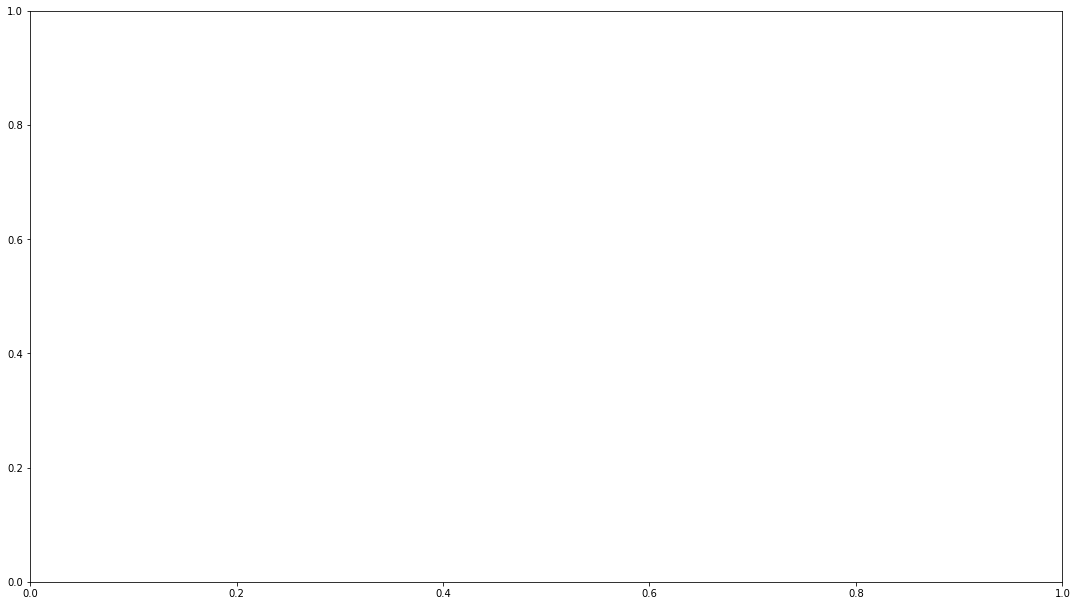

In [68]:
import pypesto.visualize

ref = pypesto.visualize.create_references(x=petab_problem.x_nominal_scaled, fval=obj(petab_problem.x_nominal_scaled))

pypesto.visualize.waterfall(result, reference=ref, scale_y='lin')
pypesto.visualize.parameters(result, reference=ref)